In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X=df.drop('math_score',axis=1)

In [4]:
y=df['math_score']

In [5]:
numeric_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
cat_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",cat_transformer,cat_features),
        ("StandardScaler",numeric_transformer,numeric_features)
    ]
)

In [6]:
X=preprocessor.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)
x_train.shape,x_test.shape

((800, 19), (200, 19))

Create an evaluation function to give all metrics after model training

In [8]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [10]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "K Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    # Make Predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    # Evaluate Train and Test Dataset
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for Training Set')
    print("- Root Mean Squared Error: {: 4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')




Linear Regression
Model performance for Training Set
- Root Mean Squared Error:  5.268372
- Mean Absolute Error: 4.2166
- R2 Score: 0.8829
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.58
- Mean Absolute Error: 4.3798
- R2 Score: 0.8444


Ridge
Model performance for Training Set
- Root Mean Squared Error:  5.268604
- Mean Absolute Error: 4.2158
- R2 Score: 0.8829
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.58
- Mean Absolute Error: 4.3773
- R2 Score: 0.8445


Lasso
Model performance for Training Set
- Root Mean Squared Error:  6.477824
- Mean Absolute Error: 5.1300
- R2 Score: 0.8229
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.34
- Mean Absolute Error: 4.9522
- R2 Score: 0.7989


K Neighbors Regressor
Model performance for Training Set
- Root Mean Squared Error:  5.853725
- Mean Absolute Error: 4.6545
- R2 Score: 0.8554
-----------------

## Result

In [11]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model,R2_score
1,Ridge,0.844507
0,Linear Regression,0.844413
6,CatBoosting Regressor,0.827956
7,AdaBoost Regressor,0.810491
2,Lasso,0.798910
5,Random Forest Regressor,0.791318
3,K Neighbors Regressor,0.747412
4,Decision Tree,0.611919


## Linear Regression

In [18]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f'% score)

Accuracy of the model is 84.44


Plotting y_pred and y_test

Text(0, 0.5, 'Predicted')

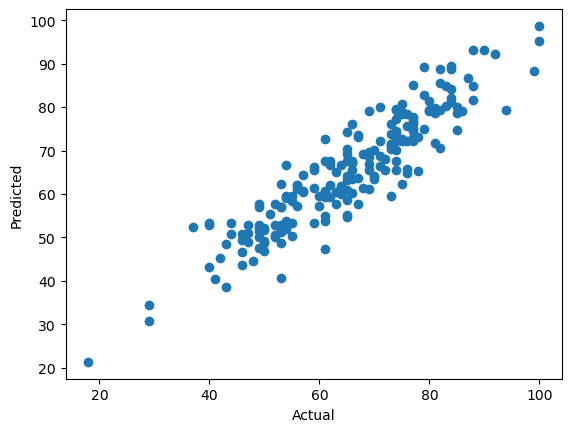

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

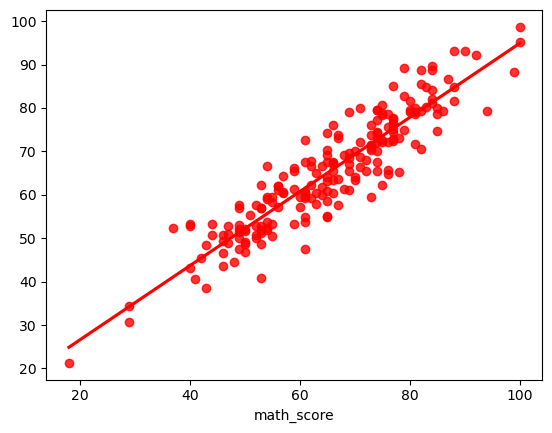

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='r')

#### Difference between predicted values and the actual values

In [25]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})

,Actual,Predicted,Difference
632,66,67.054966,-1.054966
687,77,77.358301,-0.358301
833,77,76.518711,0.481289
182,50,46.919362,3.080638
831,74,72.241057,1.758943
...,...,...,...
258,70,70.139805,-0.139805
118,51,55.361201,-4.361201
279,73,59.474935,13.525065
458,100,95.282076,4.717924
